In [1]:
# requires: pybiomart
from pybiomart import Dataset
import numpy as np
import pandas as pd

### Use the pybiomart to query gene attributes from ensembl.org

In [2]:
dataset = Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')

all_genes = dataset.query(
    attributes=[
        'ensembl_gene_id',
        'hgnc_symbol', 
        'external_gene_name', 
        'chromosome_name',
        'band'])

all_genes.rename(columns={
        'Gene stable ID': 'ensembl_gene_id',
        'Gene name': 'gene_name',
        'HGNC symbol': 'hgnc_symbol',
        'Chromosome/scaffold name': 'chr',
        'Karyotype band': 'karyotype_band'
    }, inplace=True)

In [3]:
all_genes

,ensembl_gene_id,hgnc_symbol,gene_name,chr,karyotype_band
0,ENSG00000210049,MT-TF,MT-TF,MT,NaN
1,ENSG00000211459,MT-RNR1,MT-RNR1,MT,NaN
2,ENSG00000210077,MT-TV,MT-TV,MT,NaN
3,ENSG00000210082,MT-RNR2,MT-RNR2,MT,NaN
4,ENSG00000209082,MT-TL1,MT-TL1,MT,NaN
...,...,...,...,...,...
70707,ENSG00000288629,NaN,NaN,1,p22.2
70708,ENSG00000288678,NaN,NaN,1,p35.2
70709,ENSG00000290825,NaN,DDX11L2,1,p36.33
70710,ENSG00000227232,WASH7P,WASH7P,1,p36.33


Separate karyotype bandinformation into separate columns.

In [4]:
locus_attrs = all_genes['karyotype_band'].str.extract('^([p-q])(\d)(\d)\.(\d+)').rename(columns={0:'arm', 1:'region', 2:'band', 3:'sub_band'})
locus_attrs

,arm,region,band,sub_band
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
70707,p,2,2,2
70708,p,3,5,2
70709,p,3,6,33
70710,p,3,6,33


In [5]:
all_genes['chr_arm'] = all_genes['chr'] + locus_attrs['arm']
all_genes['chr_region'] = all_genes['chr'] + locus_attrs['arm'] + locus_attrs['region']
all_genes['chr_region_band'] = all_genes['chr'] + locus_attrs['arm'] + locus_attrs['region'] + locus_attrs['band']

In [6]:
all_genes

,ensembl_gene_id,hgnc_symbol,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
0,ENSG00000210049,MT-TF,MT-TF,MT,NaN,NaN,NaN,NaN
1,ENSG00000211459,MT-RNR1,MT-RNR1,MT,NaN,NaN,NaN,NaN
2,ENSG00000210077,MT-TV,MT-TV,MT,NaN,NaN,NaN,NaN
3,ENSG00000210082,MT-RNR2,MT-RNR2,MT,NaN,NaN,NaN,NaN
4,ENSG00000209082,MT-TL1,MT-TL1,MT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
70707,ENSG00000288629,NaN,NaN,1,p22.2,1p,1p2,1p22
70708,ENSG00000288678,NaN,NaN,1,p35.2,1p,1p3,1p35
70709,ENSG00000290825,NaN,DDX11L2,1,p36.33,1p,1p3,1p36
70710,ENSG00000227232,WASH7P,WASH7P,1,p36.33,1p,1p3,1p36


In [7]:
filter_no_name = all_genes['gene_name'].isnull()
named_genes = all_genes[~filter_no_name]
named_genes.describe()

,ensembl_gene_id,hgnc_symbol,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
count,48111,46468,48111,48111,42586,37432,37432,37432
unique,48110,40942,41042,462,257,46,82,216
top,ENSG00000230417,LILRP2,Y_RNA,1,p11.2,1p,1p3,19q13
freq,2,73,840,4014,1141,1999,1504,1215


Notice that some genes appear in multiple chromossomes/locations. VAMP7 is an example, as seen below.

In [8]:
named_genes[named_genes['gene_name']=='VAMP7']

,ensembl_gene_id,hgnc_symbol,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
853,ENSG00000292366,VAMP7,VAMP7,Y,q12,NaN,NaN,NaN
13423,ENSG00000124333,VAMP7,VAMP7,X,q28,NaN,NaN,NaN


Find all genes names that appear multiple times.

In [9]:
duplicated_names = named_genes.duplicated(subset=['gene_name'], keep=False)
named_genes[duplicated_names].sort_values(by='gene_name')

,ensembl_gene_id,hgnc_symbol,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
50404,ENSG00000277488,NaN,5S_rRNA,17,q12,NaN,NaN,NaN
67063,ENSG00000285626,NaN,5S_rRNA,2,p25.1,2p,2p2,2p25
44,ENSG00000278457,NaN,5S_rRNA,KI270442.1,NaN,NaN,NaN,NaN
41324,ENSG00000285609,NaN,5S_rRNA,1,q25.3,1q,1q2,1q25
11468,ENSG00000278779,NaN,5S_rRNA,HSCHR17_7_CTG4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
56653,ENSG00000132003,ZSWIM4,ZSWIM4,19,p13.13,19p,19p1,19p13
44574,ENSG00000159840,ZYX,ZYX,7,q34,NaN,NaN,NaN
4820,ENSG00000285443,ZYX,ZYX,HG708_PATCH,NaN,NaN,NaN,NaN
64953,ENSG00000281780,NaN,snoZ196,2,q33.3,2q,2q3,2q33


In [10]:
columns = ['gene_name', 'chr', 'karyotype_band', 'chr_arm', 'chr_region', 'chr_region_band']

df_gene_locus_unique = named_genes[columns][~duplicated_names]
df_gene_locus_unique.to_csv('gene_locus_attributes_unique.csv', index=False)

df_gene_locus = named_genes[columns]
df_gene_locus.to_csv('gene_locus_attributes_full.csv', index=False)

### Join CNA file with gene locus attributes

In [11]:
def read_data(file_path):
    df = pd.read_csv(file_path, delimiter='\t')
    df = df.T
    df = df.rename_axis('id').reset_index()
    return df

In [12]:
df_cna = read_data('./data/CPTAC/DISCOVERY_data_freeze_v_2.1/UCEC_discovery_WGS_CNA_gene_level_THRESHOLD.txt')
df_cna

,id,DDX11L1,FAM138A|chr1,FAM87B,LOC100133331|chr1,LOC100288069,LOC729737,MIR6723,MIR6859-1|chr1,OR4F16|chr1,...,DAZ3,TTTY3,CDY1,CSPG4P1Y,GOLGA2P2Y,TTTY3B,DDX11L16|chrY,IL9R|chrY,SPRY3|chrY,VAMP7|chrY
0,S001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,S100,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
92,S101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,S102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_cna_long = df_cna.melt(id_vars=['id']).rename(columns={'variable': 'gene', 'value': 'cna'})
df_cna_long

,id,gene,cna
0,S001,DDX11L1,0
1,S002,DDX11L1,0
2,S003,DDX11L1,0
3,S005,DDX11L1,0
4,S006,DDX11L1,0
...,...,...,...
2398175,S099,VAMP7|chrY,0
2398176,S100,VAMP7|chrY,0
2398177,S101,VAMP7|chrY,0
2398178,S102,VAMP7|chrY,0


Split multi-values field 'gene' into two separate columns for the gene and chromosome

In [14]:
gene_values = df_cna_long['gene'].str.split('|', n=2, expand=True).rename(columns={0:'gene', 1:'chr'})
gene_values['chr'] = gene_values['chr'].str.replace('chr', '')
gene_values

,gene,chr
0,DDX11L1,None
1,DDX11L1,None
2,DDX11L1,None
3,DDX11L1,None
4,DDX11L1,None
...,...,...
2398175,VAMP7,Y
2398176,VAMP7,Y
2398177,VAMP7,Y
2398178,VAMP7,Y


<Axes: ylabel='chr'>

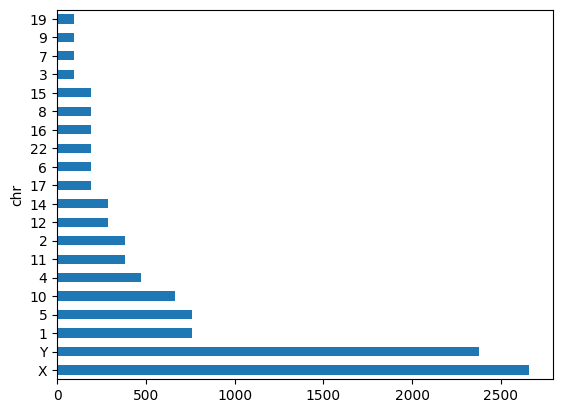

In [15]:
gene_values['chr'].value_counts().plot.barh()

In [16]:
df_cna_long['gene_name'] = gene_values['gene']
df_cna_long['chr']  = gene_values['chr']

In [17]:
df_cna_long

,id,gene,cna,gene_name,chr
0,S001,DDX11L1,0,DDX11L1,None
1,S002,DDX11L1,0,DDX11L1,None
2,S003,DDX11L1,0,DDX11L1,None
3,S005,DDX11L1,0,DDX11L1,None
4,S006,DDX11L1,0,DDX11L1,None
...,...,...,...,...,...
2398175,S099,VAMP7|chrY,0,VAMP7,Y
2398176,S100,VAMP7|chrY,0,VAMP7,Y
2398177,S101,VAMP7|chrY,0,VAMP7,Y
2398178,S102,VAMP7|chrY,0,VAMP7,Y


In [18]:
filter_has_chr_info = (~df_cna_long['chr'].isnull())
filter_has_chr_info.sum()

10545

In [19]:
df_cna_long[filter_has_chr_info]

,id,gene,cna,gene_name,chr
95,S001,FAM138A|chr1,0,FAM138A,1
96,S002,FAM138A|chr1,0,FAM138A,1
97,S003,FAM138A|chr1,0,FAM138A,1
98,S005,FAM138A|chr1,0,FAM138A,1
99,S006,FAM138A|chr1,0,FAM138A,1
...,...,...,...,...,...
2398175,S099,VAMP7|chrY,0,VAMP7,Y
2398176,S100,VAMP7|chrY,0,VAMP7,Y
2398177,S101,VAMP7|chrY,0,VAMP7,Y
2398178,S102,VAMP7|chrY,0,VAMP7,Y


In [20]:
df_cna_long_chr = pd.merge(df_cna_long[filter_has_chr_info], df_gene_locus, left_on=['gene_name', 'chr'], right_on=['gene_name', 'chr'], how='left')
df_cna_long_chr

,id,gene,cna,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
0,S001,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
1,S002,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
2,S003,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
3,S005,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
4,S006,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
...,...,...,...,...,...,...,...,...,...
10730,S099,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN
10731,S100,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN
10732,S101,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN
10733,S102,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN


In [21]:
df_cna_long_chr[df_cna_long_chr.duplicated(keep=False)]

,id,gene,cna,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
7125,S001,CD99P1|chrX,0,CD99P1,X,p22.33,Xp,Xp2,Xp22
7126,S001,CD99P1|chrX,0,CD99P1,X,p22.33,Xp,Xp2,Xp22
7127,S002,CD99P1|chrX,0,CD99P1,X,p22.33,Xp,Xp2,Xp22
7128,S002,CD99P1|chrX,0,CD99P1,X,p22.33,Xp,Xp2,Xp22
7129,S003,CD99P1|chrX,0,CD99P1,X,p22.33,Xp,Xp2,Xp22
...,...,...,...,...,...,...,...,...,...
8830,S101,CD99P1|chrY,0,CD99P1,Y,p11.2,Yp,Yp1,Yp11
8831,S102,CD99P1|chrY,0,CD99P1,Y,p11.2,Yp,Yp1,Yp11
8832,S102,CD99P1|chrY,0,CD99P1,Y,p11.2,Yp,Yp1,Yp11
8833,S103,CD99P1|chrY,0,CD99P1,Y,p11.2,Yp,Yp1,Yp11


In [22]:
df_cna_long_chr.drop_duplicates(keep='first', inplace=True)
df_cna_long_chr

,id,gene,cna,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
0,S001,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
1,S002,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
2,S003,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
3,S005,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
4,S006,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
...,...,...,...,...,...,...,...,...,...
10730,S099,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN
10731,S100,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN
10732,S101,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN
10733,S102,VAMP7|chrY,0,VAMP7,Y,q12,NaN,NaN,NaN


In [23]:
assert df_cna_long[filter_has_chr_info].shape[0] == df_cna_long_chr.shape[0]
df_cna_long[filter_has_chr_info].shape, df_cna_long_chr.shape

((10545, 5), (10545, 9))

In [24]:
df_cna_long[~filter_has_chr_info].shape

(2387635, 5)

In [25]:
df_cna_long_unique = pd.merge(df_cna_long[~filter_has_chr_info], df_gene_locus_unique, left_on='gene_name', right_on='gene_name', how='left')
df_cna_long_unique

,id,gene,cna,gene_name,chr_x,chr_y,karyotype_band,chr_arm,chr_region,chr_region_band
0,S001,DDX11L1,0,DDX11L1,None,1,p36.33,1p,1p3,1p36
1,S002,DDX11L1,0,DDX11L1,None,1,p36.33,1p,1p3,1p36
2,S003,DDX11L1,0,DDX11L1,None,1,p36.33,1p,1p3,1p36
3,S005,DDX11L1,0,DDX11L1,None,1,p36.33,1p,1p3,1p36
4,S006,DDX11L1,0,DDX11L1,None,1,p36.33,1p,1p3,1p36
...,...,...,...,...,...,...,...,...,...,...
2387630,S099,TTTY3B,0,TTTY3B,None,Y,q11.23,Yq,Yq1,Yq11
2387631,S100,TTTY3B,0,TTTY3B,None,Y,q11.23,Yq,Yq1,Yq11
2387632,S101,TTTY3B,0,TTTY3B,None,Y,q11.23,Yq,Yq1,Yq11
2387633,S102,TTTY3B,0,TTTY3B,None,Y,q11.23,Yq,Yq1,Yq11


In [26]:
df_cna_long_unique.drop(columns=['chr_x'], inplace=True)
df_cna_long_unique.rename(columns={'chr_y': 'chr'}, inplace=True)
df_cna_long_unique

,id,gene,cna,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
0,S001,DDX11L1,0,DDX11L1,1,p36.33,1p,1p3,1p36
1,S002,DDX11L1,0,DDX11L1,1,p36.33,1p,1p3,1p36
2,S003,DDX11L1,0,DDX11L1,1,p36.33,1p,1p3,1p36
3,S005,DDX11L1,0,DDX11L1,1,p36.33,1p,1p3,1p36
4,S006,DDX11L1,0,DDX11L1,1,p36.33,1p,1p3,1p36
...,...,...,...,...,...,...,...,...,...
2387630,S099,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11
2387631,S100,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11
2387632,S101,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11
2387633,S102,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11


In [27]:
df_cna_final = pd.concat([df_cna_long_chr, df_cna_long_unique])
df_cna_final

,id,gene,cna,gene_name,chr,karyotype_band,chr_arm,chr_region,chr_region_band
0,S001,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
1,S002,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
2,S003,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
3,S005,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
4,S006,FAM138A|chr1,0,FAM138A,1,p36.33,1p,1p3,1p36
...,...,...,...,...,...,...,...,...,...
2387630,S099,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11
2387631,S100,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11
2387632,S101,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11
2387633,S102,TTTY3B,0,TTTY3B,Y,q11.23,Yq,Yq1,Yq11


In [28]:
assert df_cna_final.shape[0] == df_cna_long.shape[0]
df_cna_final.shape, df_cna_long.shape

((2398180, 9), (2398180, 5))

In [29]:
df_cna_final.to_csv('UCEC_discovery_WGS_CNA_gene_level_THRESHOLD__with_locus.csv', index=False)

### Join sommatic mutations (Gene Level) with gene locus attributes

In [30]:
df_sommut = read_data('./data/CPTAC/DISCOVERY_data_freeze_v_2.1/UCEC_discovery_somatic_mutation_gene_level.txt')
df_sommut

,id,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZUFSP,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,S001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S099,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
91,S100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,S101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,S102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_sommut_long = df_sommut.melt(id_vars=['id']).rename(columns={'variable': 'gene', 'value': 'sommut'})
df_sommut_long

,id,gene,sommut
0,S001,A1BG,0
1,S002,A1BG,0
2,S003,A1BG,0
3,S005,A1BG,0
4,S006,A1BG,0
...,...,...,...
1411600,S099,ZZZ3,0
1411601,S100,ZZZ3,0
1411602,S101,ZZZ3,0
1411603,S102,ZZZ3,0


In [32]:
df_sommut_final = pd.merge(df_sommut_long, df_gene_locus_unique, left_on='gene', right_on='gene_name', how='left').drop(columns=['gene_name'])
df_sommut_final

,id,gene,sommut,chr,karyotype_band,chr_arm,chr_region,chr_region_band
0,S001,A1BG,0,19,q13.43,19q,19q1,19q13
1,S002,A1BG,0,19,q13.43,19q,19q1,19q13
2,S003,A1BG,0,19,q13.43,19q,19q1,19q13
3,S005,A1BG,0,19,q13.43,19q,19q1,19q13
4,S006,A1BG,0,19,q13.43,19q,19q1,19q13
...,...,...,...,...,...,...,...,...
1411600,S099,ZZZ3,0,1,p31.1,1p,1p3,1p31
1411601,S100,ZZZ3,0,1,p31.1,1p,1p3,1p31
1411602,S101,ZZZ3,0,1,p31.1,1p,1p3,1p31
1411603,S102,ZZZ3,0,1,p31.1,1p,1p3,1p31


In [33]:
assert df_sommut_final.shape[0] == df_sommut_long.shape[0]
df_sommut_final.shape, df_sommut_long.shape

((1411605, 8), (1411605, 3))

In [34]:
df_sommut_final.to_csv('UCEC_discovery_somatic_mutation_gene_level__with_locus.csv', index=False)